In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para os gráficos aparecem melhor

In [42]:
%matplotlib inline
sns.set_theme(style="whitegrid", palette="viridis")

# Carregando arquivo da base de dados

# Carrega a aba especificada no PDF ('Base Prova Única')

In [43]:
nome_arquivo = 'Base_Estag_Dados.xlsx'
aba_dados = 'Base_Prova_Unica'

try:
    df = pd.read_excel(nome_arquivo, sheet_name=aba_dados)
    print("Arquivo carregado com sucesso!")
except FileNotFoundError:
    print(f"Erro: O arquivo '{nome_arquivo}' não foi encontrado. Verifique a pasta.")

Arquivo carregado com sucesso!


# BLOCO 1: Automatização e Pivotagem

In [44]:
print("\n--- Executando Bloco 1 ---")


--- Executando Bloco 1 ---


In [45]:
df_pivotado = df.pivot_table(
    index=['RA', 'NOME COMPLETO', 'ORIGEM', 'PRACA'],
    columns='ÁREA',
    values='ENEM_Projetado'
).reset_index()

# Visualizando Resultado

In [46]:
print(f"Base transformada. Total de alunos únicos: {len(df_pivotado)}")
display(df_pivotado.head())

Base transformada. Total de alunos únicos: 2550


ÁREA,RA,NOME COMPLETO,ORIGEM,PRACA,CH,CN,LI,MA
0,2545,ALINE,EB,SP,695.906615,657.264709,667.513141,728.627545
1,2547,BARBARA,EB,SP,680.436229,471.296044,655.513717,646.646025
2,2550,FRANCISCO,EB,SP,658.077029,618.081889,692.623383,763.575095
3,2551,GABRIEL,EB,SP,732.934631,682.165971,720.693663,736.060302
4,2553,GUILHERME,EB,SP,838.758293,870.382180,770.807568,776.047159


# Exportação do entregável

In [47]:
df_pivotado.to_excel('Entrega_Bloco1_Base_Unica.xlsx', index=False)
print("Arquivo 'Entrega_Bloco1_Base_Unica.xlsx' salvo com sucesso.")

Arquivo 'Entrega_Bloco1_Base_Unica.xlsx' salvo com sucesso.


# BLOCO 2: Análises Estatísticas

In [48]:
print("\n--- Executando Bloco 2 ---")


--- Executando Bloco 2 ---


In [49]:
# Correlação
cols_corr = ['NOTA DESEMPENHO', 'Media_ENEM', 'ENEM_Projetado']
correlacao = df[cols_corr].corr()

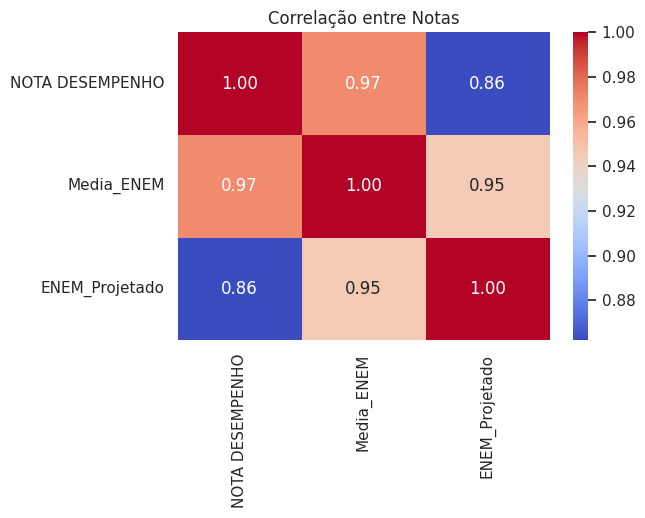

In [50]:
# Conclusão visual (Heatmap)
plt.figure(figsize=(6, 4))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlação entre Notas")
plt.show()

In [51]:
print("\n>> CONCLUSÃO SOBRE A CORRELAÇÃO:")
print("-" * 60)
print(f"Observamos uma correlação extremamente alta (0.95) entre 'Media_ENEM' e 'ENEM_Projetado'.")
print("ISSO SIGNIFICA QUE: O modelo de projeção é altamente linear e dependente da média simples.")
print("NA PRÁTICA: As métricas são redundantes. Um aluno com boa média no simulado terá,")
print("invariavelmente, uma projeção alta. O 'ENEM_Projetado' não está trazendo variações")
print("inesperadas em relação ao desempenho base do aluno.")
print("-" * 60)


>> CONCLUSÃO SOBRE A CORRELAÇÃO:
------------------------------------------------------------
Observamos uma correlação extremamente alta (0.95) entre 'Media_ENEM' e 'ENEM_Projetado'.
ISSO SIGNIFICA QUE: O modelo de projeção é altamente linear e dependente da média simples.
NA PRÁTICA: As métricas são redundantes. Um aluno com boa média no simulado terá,
invariavelmente, uma projeção alta. O 'ENEM_Projetado' não está trazendo variações
inesperadas em relação ao desempenho base do aluno.
------------------------------------------------------------


# Comparativo por Praça
# Agrupando por Praça e calculando a média

2. A praça com maior média é: Belo Horizonte (725.21)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Belo Horizonte'),
  Text(1, 0, 'SÃO PAULO'),
  Text(2, 0, 'CO'),
  Text(3, 0, 'SO'),
  Text(4, 0, 'SP'),
  Text(5, 0, 'BH'),
  Text(6, 0, 'SJC'),
  Text(7, 0, 'RJ'),
  Text(8, 0, 'Rio de Janeiro'),
  Text(9, 0, 'São Paulo')])

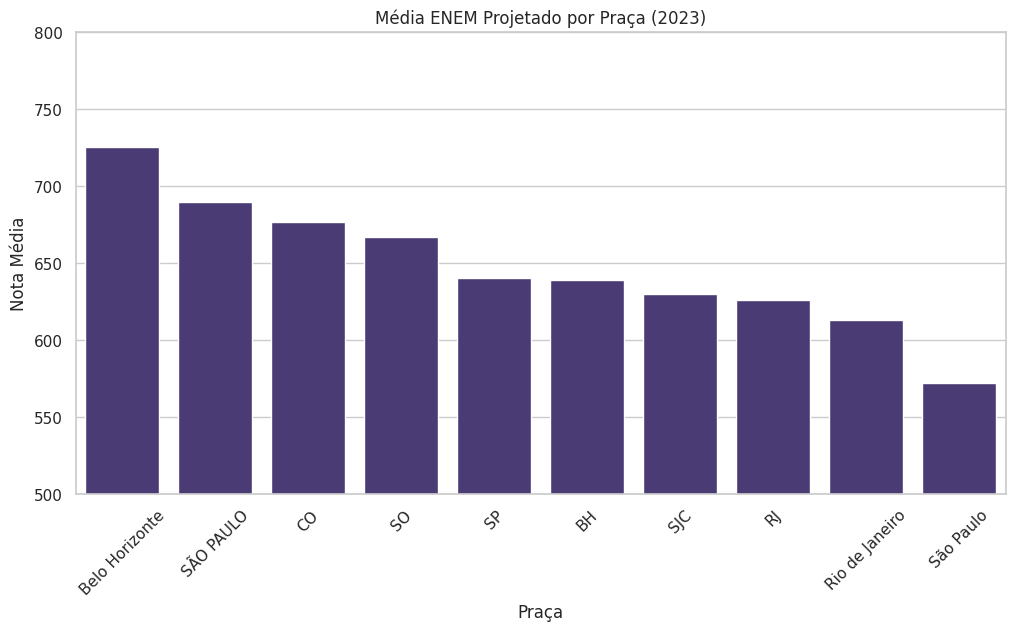

In [52]:
media_praca = df.groupby('PRACA')['ENEM_Projetado'].mean().sort_values(ascending=False).reset_index()
top_praca = media_praca.iloc[0]

print(f"2. A praça com maior média é: {top_praca['PRACA']} ({top_praca['ENEM_Projetado']:.2f})")

plt.figure(figsize=(12, 6))
grafico = sns.barplot(data=media_praca, x='PRACA', y='ENEM_Projetado')
plt.title('Média ENEM Projetado por Praça (2023)')
plt.ylabel('Nota Média')
plt.xlabel('Praça')
plt.ylim(500, 800) # Ajuste de escala para visualizar melhor as diferenças
plt.xticks(rotation=45)

# Adicionando rótulos nas barras

In [53]:
for index, row in media_praca.iterrows():
    grafico.text(index, row.ENEM_Projetado + 5, f'{row.ENEM_Projetado:.1f}', color='black', ha="center")
plt.show()

# Análise Exploratória e Conclusões

In [54]:
print("3. Insights Exploratórios para Ação:")

3. Insights Exploratórios para Ação:


# Insight A: Desempenho por Área

In [55]:
media_area = df.groupby('ÁREA')['ENEM_Projetado'].mean().sort_values()
pior_area = media_area.index[0]
print(f"\n-> Análise por Área: A área com menor desempenho é {pior_area} ({media_area.iloc[0]:.1f}).")
print("   Ação Sugerida: Reforço pedagógico específico em Ciências da Natureza.")


-> Análise por Área: A área com menor desempenho é CN (610.6).
   Ação Sugerida: Reforço pedagógico específico em Ciências da Natureza.


# Insight B: Desempenho por Origem

In [56]:
media_origem = df.groupby('ORIGEM')['ENEM_Projetado'].mean().sort_values(ascending=False)
diff_origem = media_origem.iloc[0] - media_origem.iloc[-1]
print(f"\n-> Análise por Origem: Diferença de {diff_origem:.1f} pontos entre {media_origem.index[0]} e {media_origem.index[-1]}.")
print("   Ação Sugerida: Investigar causas da defasagem no grupo de menor desempenho (IOL).")


-> Análise por Origem: Diferença de 68.8 pontos entre EB e IOL.
   Ação Sugerida: Investigar causas da defasagem no grupo de menor desempenho (IOL).
